# Comparing similarity judgments among blind individuals to word embeddings

Sean Trott (4/16/2019)

## Load verbs

In [1]:
import pandas as pd

from tqdm import tqdm

In [2]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")

In [3]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


## Obtain word embeddings for each word

In [19]:
from allennlp.commands.elmo import ElmoEmbedder

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [41]:
elmo = ElmoEmbedder()

In [42]:
embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0].tolist()
    
    embeddings.append(decontextualized)

100%|██████████| 105/105 [01:02<00:00,  1.40it/s]


In [43]:
df_verbs['embedding'] = embeddings

## Dimensionality reduce

In [18]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

In [46]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [47]:
# Kind of ugly, fix later
df_verbs['pc1'] = list(principalDf['pc1'])
df_verbs['pc2'] = list(principalDf['pc2'])

In [48]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...",-0.078595,-2.329108
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...",-2.234155,2.978767
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633142709732, 1.394661545753479, 0.059...",-2.213300,0.444036
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.2201690673828125, 0.06947101652622223, -0.7...",-3.475894,0.028073
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750277757644653, 0.289326548576355, 0.46...",-4.541126,2.260716


## Plot

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


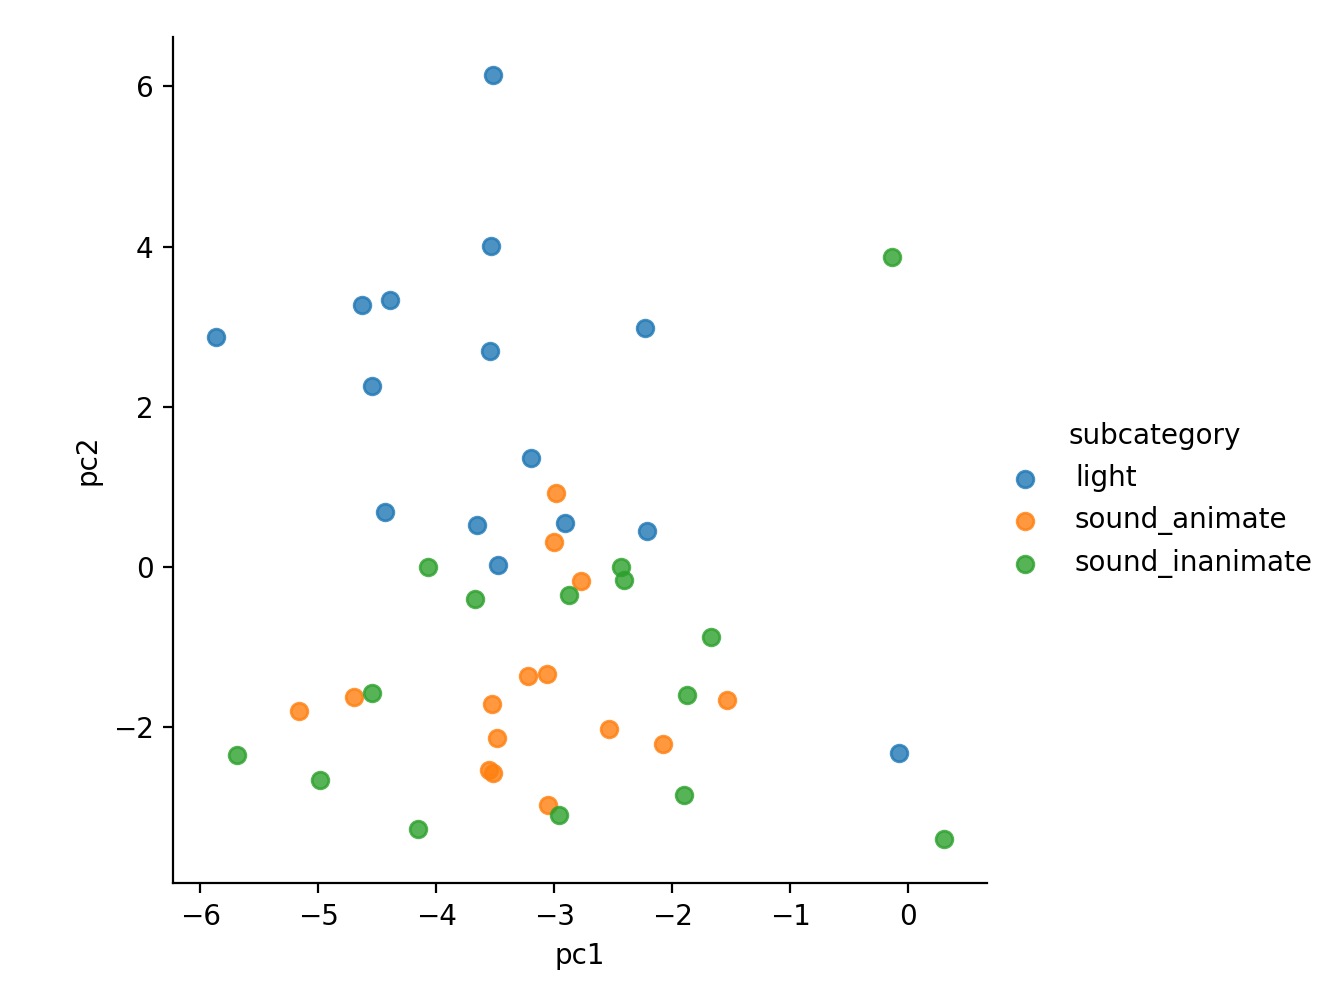

In [50]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory', 
           legend=True)

<IPython.core.display.Javascript object>


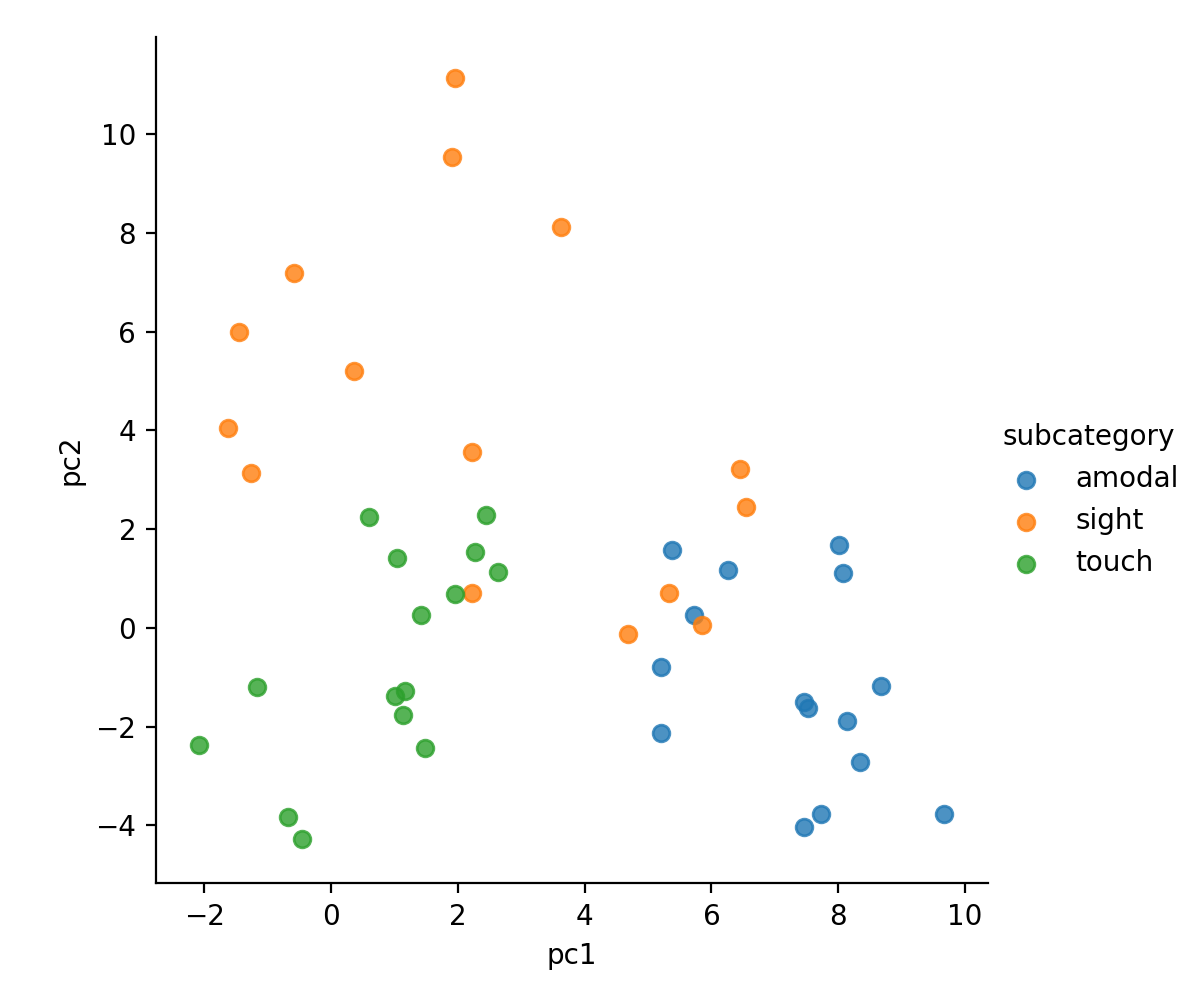

In [117]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

## Hierarchical clustering

### For sight perception

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [57]:
df_sighted = df_verbs[df_verbs['subcategory']=="sight"]
len(df_sighted)

15

In [58]:
X = df_sighted[['pc1', 'pc2']].values

In [59]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


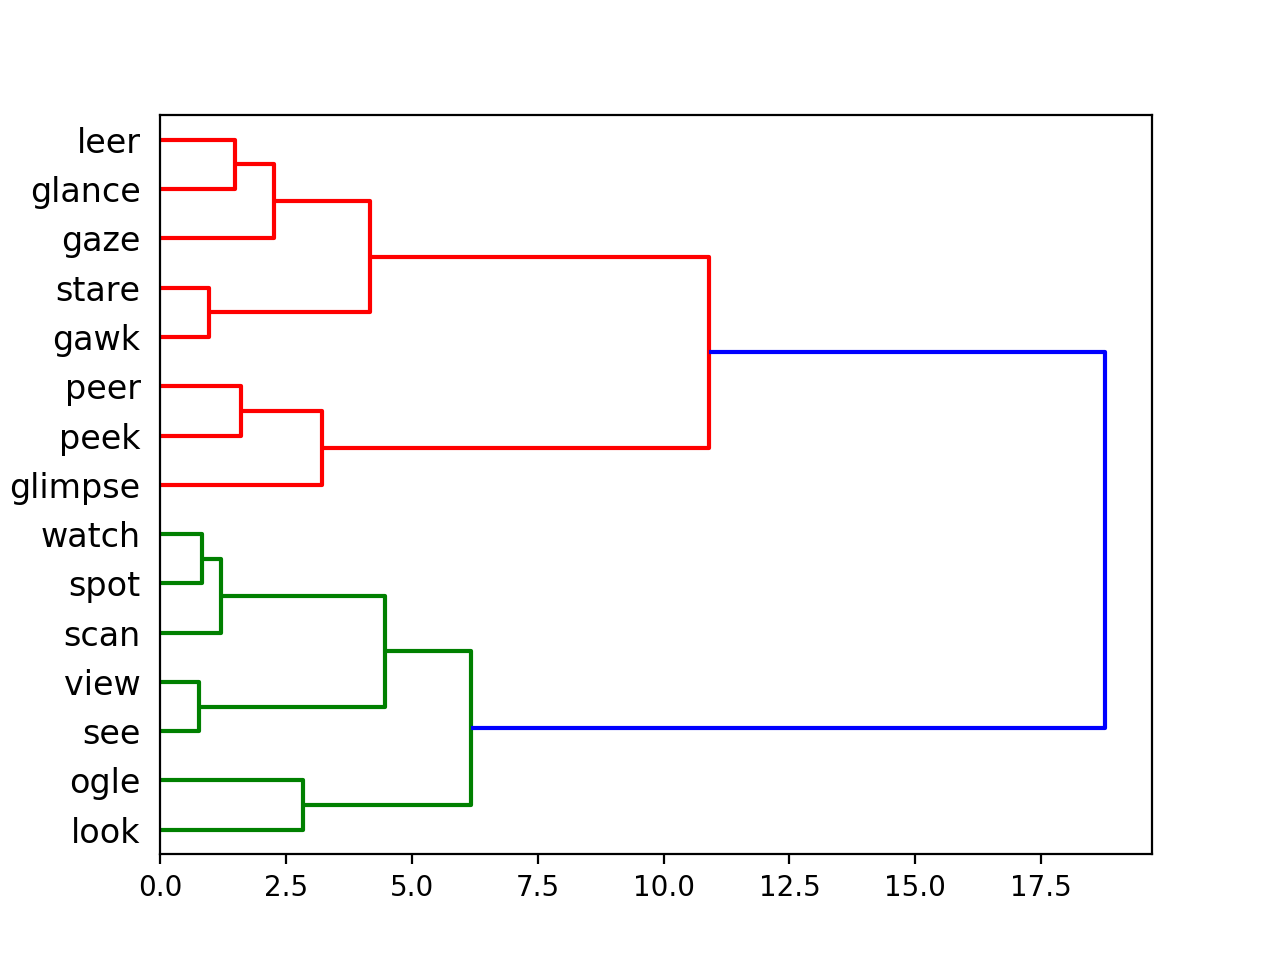

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [25.625, 25.625, 101.875, 101.875]],
 'dcoord': [[0.0, 2.842821502353081, 2.842821502353081, 0.0],
  [0.0, 0.7694132971287395, 0.7694132971287395, 0.0],
  [0.0, 0.8313942464569082, 0.8313942464569082, 0.0],
  [0.0, 1.2079326460385535, 1.2079326460385535, 0.8313942464569082],
  [0.7694132971287395,
   4.469037166348356,
   4.469037166348356,
   1.2079326460385535],
  [2.842821502353081,
   6.1764010009756145,
   6.1764010009756145,
   4.469037166348356],
  [0.0, 1.616505614844954, 1.616505614844954, 0.0],
  [0.0, 3.2241248294041918, 3.2241248294041918, 1.616505614844954],
  [0.0, 0.9803870145602762

In [60]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_sighted['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

In [61]:
df_verbs.to_csv("data/processed/verbs_with_embeddings.csv")

## Get similarity scores

In [12]:
import itertools
import scipy
import ast

In [13]:
df_verbs = pd.read_csv("data/processed/verbs_with_embeddings.csv")

In [14]:
df_verbs['concat_test'] = df_verbs['embedding'].map(str) + "*" + df_verbs['verb']

In [20]:
analysis = []
for item1, item2 in tqdm(list(itertools.combinations(list(df_verbs['concat_test']), 2))):
    
    e1, e2 = ast.literal_eval(item1.split("*")[0]), ast.literal_eval(item2.split("*")[0])
    w1, w2 = item1.split("*")[1], item2.split("*")[1]

    # e1 = elmo.embed_sentence(w1)[0][0]
    # e2 = elmo.embed_sentence(w2)[0][0]
    
    embedding_distance = scipy.spatial.distance.cosine(e1, e2)
    
    analysis.append({
        'w1': w1,
        'w2': w2,
        'cosine_distance': embedding_distance
    })


100%|██████████| 5460/5460 [01:01<00:00, 79.57it/s] 


In [21]:
df_analysis = pd.DataFrame(analysis)
df_analysis.head(5)

,cosine_distance,w1,w2
0,0.900461,blaze,blink
1,0.780368,blaze,flare
2,0.929387,blaze,flash
3,0.865661,blaze,flicker
4,0.856313,blaze,gleam


In [75]:
df_analysis.to_csv("data/processed/verb_embedding_distances.csv")

## Load ppt data

In [22]:
df_participant_judgments = pd.read_csv("data/datalong_CBSAMT.csv")

In [23]:
df_participant_judgments.head(5)

,C1,C2,S1,S2,Category,V1,V2,S_01,S_02,S_03,...,CB_31,CB_32,CB_33,CB_34,CB_35,CB_37,CB_38,CB_40,CB_41,AMT_av
0,Sound,Sound,Sanim,Sinanim,Emission,bark,beep,1,3,4,...,1,1.0,1.0,1.0,2.0,1.0,2,1.0,2.0,2.351351
1,Sound,Sound,Sanim,Sanim,Emission,bark,bellow,1,5,5,...,1,4.0,4.0,7.0,4.0,4.0,3,1.0,5.0,4.705882
2,Sound,Light,Sanim,Light,Emission,bark,blaze,1,1,1,...,1,1.0,1.0,6.0,1.0,1.0,1,1.0,5.0,2.184211
3,Sound,Light,Sanim,Light,Emission,bark,blink,1,1,4,...,1,1.0,1.0,7.0,1.0,1.0,1,1.0,2.0,1.657895
4,Sound,Sound,Sanim,Sinanim,Emission,bark,boom,2,3,4,...,1,1.0,1.0,6.0,1.0,4.0,3,1.0,5.0,4.228571


In [24]:
len(df_participant_judgments)

2806

In [25]:
len(df_analysis)

5460

### Combine

In [26]:
def combine_words(row, word1='w1', word2='w2'):
    w1, w2 = row[word1], row[word2]
    return '_'.join(sorted([w1, w2]))

In [27]:
df_participant_judgments['combined_words'] = df_participant_judgments.apply(
    lambda row: combine_words(row, word1='V1', word2='V2'), axis=1)

In [28]:
df_analysis['combined_words'] = df_analysis.apply(lambda row: combine_words(row), axis=1)

In [29]:
df_analysis_subset = df_analysis[df_analysis['combined_words'].isin(list(df_participant_judgments['combined_words']))]

In [30]:
df_merged = pd.merge(df_analysis, df_participant_judgments)
df_merged['same_modality'] = df_merged['C1'] == df_merged['C2']

In [31]:
df_merged.head(5)

,cosine_distance,w1,w2,combined_words,C1,C2,S1,S2,Category,V1,...,CB_32,CB_33,CB_34,CB_35,CB_37,CB_38,CB_40,CB_41,AMT_av,same_modality
0,0.900461,blaze,blink,blaze_blink,Light,Light,Light,Light,Emission,blaze,...,1.0,3.0,1.0,1.0,1.0,3,1.0,2.0,2.000,True
1,0.780368,blaze,flare,blaze_flare,Light,Light,Light,Light,Emission,blaze,...,4.0,4.0,7.0,4.0,7.0,5,7.0,6.0,4.725,True
2,0.929387,blaze,flash,blaze_flash,Light,Light,Light,Light,Emission,blaze,...,5.0,4.0,7.0,3.0,7.0,4,4.0,6.0,4.025,True
3,0.865661,blaze,flicker,blaze_flicker,Light,Light,Light,Light,Emission,blaze,...,2.0,3.0,1.0,1.0,7.0,3,3.0,3.0,3.750,True
4,0.856313,blaze,gleam,blaze_gleam,Light,Light,Light,Light,Emission,blaze,...,2.0,3.0,4.0,1.0,7.0,5,5.0,4.0,3.225,True


In [32]:
df_merged.to_csv("data/processed/judgments_with_embeddings.csv")

<IPython.core.display.Javascript object>


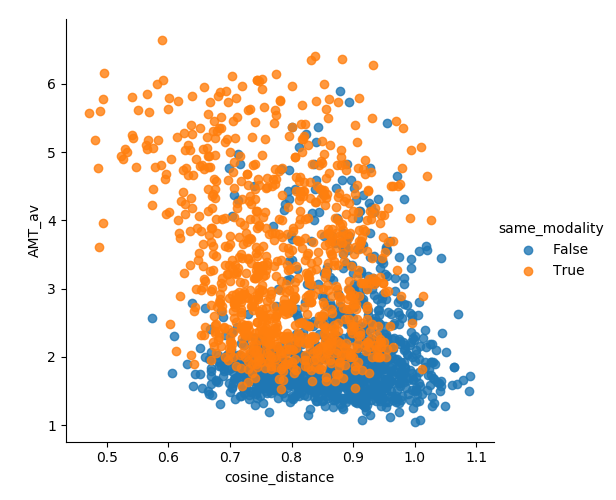

In [35]:
sns.lmplot(x="cosine_distance", y="AMT_av", data=df_merged, 
           fit_reg=False, hue='same_modality',
           legend=True)

### Briefly test stats

Predicting amazon turk estimates.

In [36]:
import statsmodels.formula.api as sm

In [37]:
result = sm.ols(formula="AMT_av ~ cosine_distance * same_modality", data=df_merged).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AMT_av   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     340.2
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          7.61e-179
Time:                        13:29:44   Log-Likelihood:                -2756.9
No. Observations:                2027   AIC:                             5522.
Df Residuals:                    2023   BIC:                             5544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.6894      0.268      6.302      0.000       1.164       2.215
same_modality[T.True]                     3.9031      0.363     10.738      0.000       3.190       4.616
cosine_distance                           0.4483      0.309      1.452      0.147      -0.157       1.054
cosine_distance:same_modality[T.True]    -3.2917      0.438     -7.518      0.000      -4.150      -2.433
==============================================================================
Omnibus:                      272.555   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.405
Skew:                           0.986   Prob(JB):                     5.06e-87
Kurtosis:                       3.902   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modeling similarity judgments by group

In [38]:
df_merged = pd.read_csv("data/processed/judgments_with_embeddings.csv")

In [39]:
sighted_columns = ['S_01', 'S_02', 'S_03', 'S_04', 'S_05', 'S_07',
       'S_08', 'S_09', 'S_10', 'S_11', 'S_12', 'S_13', 'S_14', 'S_16', 'S_17',
       'S_18', 'S_19', 'S_20', 'S_21', 'S_22', 'S_23', 'S_24']
blind_columns = ['CB_06',
       'CB_08', 'CB_09', 'CB_14', 'CB_15', 'CB_18', 'CB_19', 'CB_22', 'CB_23',
       'CB_24', 'CB_25', 'CB_26', 'CB_27', 'CB_28', 'CB_29', 'CB_30', 'CB_31',
       'CB_32', 'CB_33', 'CB_34', 'CB_35', 'CB_37', 'CB_38', 'CB_40', 'CB_41']

In [40]:
def get_group_average(row, columns):
    row = row.fillna(0)
    row_col = row[columns].values
    # row_col = [i for i in row_col if i >0 ]
    return row_col.mean()

In [41]:
df_merged['blind_avg'] = df_merged.apply(lambda x: get_group_average(x, columns=blind_columns), 
                                         axis=1)

In [42]:
df_merged['sighted_avg'] = df_merged.apply(lambda x: get_group_average(x, columns=sighted_columns), 
                                         axis=1)

<IPython.core.display.Javascript object>


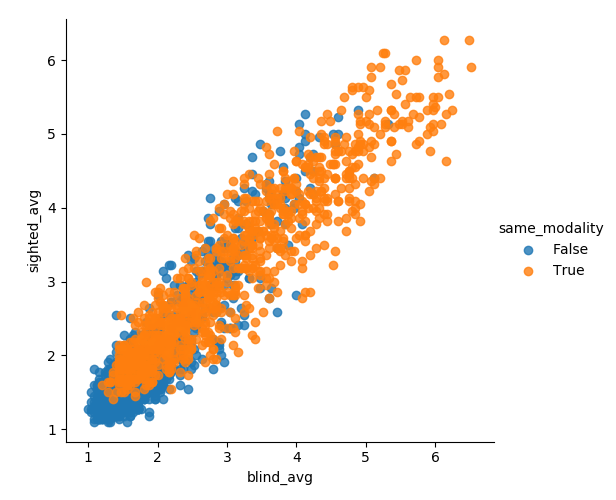

In [43]:
sns.lmplot(x="blind_avg", y="sighted_avg", data=df_merged, 
           fit_reg=False, hue='same_modality',
           legend=True)

### Multidimensional scaling

In [44]:
from sklearn.manifold import MDS

In [48]:
df_merged = df_merged.fillna(0)

In [49]:
X_sighted = df_merged[sighted_columns]
X_blind = df_merged[blind_columns]

In [69]:
embedding = MDS(n_components=2)
X_sighted_transformed = embedding.fit_transform(X_sighted)
df_mds_sighted = pd.DataFrame(X_sighted_transformed, columns=['d1', 'd2'])

In [71]:
X_blind_transformed = embedding.fit_transform(X_blind)
df_mds_blind = pd.DataFrame(X_blind_transformed, columns=['d1', 'd2'])

In [102]:
# Kind of ugly, fix later
df_merged['d1_sight'] = list(df_mds_sighted['d1'])
df_merged['d2_sight'] = list(df_mds_sighted['d2'])
df_merged['d1_blind'] = list(df_mds_blind['d1'])
df_merged['d2_blind'] = list(df_mds_blind['d2'])

In [103]:
df_merged.head(5)

,Unnamed: 0,cosine_distance,w1,w2,combined_words,C1,C2,S1,S2,Category,...,CB_40,CB_41,AMT_av,same_modality,blind_avg,sighted_avg,d1_sight,d2_sight,d1_blind,d2_blind
0,0,0.900461,blaze,blink,blaze_blink,Light,Light,Light,Light,Emission,...,1.0,2.0,2.000,True,2.20,1.545455,4.078003,-2.877571,-5.399171,0.962027
1,1,0.780368,blaze,flare,blaze_flare,Light,Light,Light,Light,Emission,...,7.0,6.0,4.725,True,4.96,4.863636,-11.062181,6.775713,5.470500,13.635753
2,2,0.929387,blaze,flash,blaze_flash,Light,Light,Light,Light,Emission,...,4.0,6.0,4.025,True,4.40,3.909091,-3.433600,8.813651,6.197912,9.588834
3,3,0.865661,blaze,flicker,blaze_flicker,Light,Light,Light,Light,Emission,...,3.0,3.0,3.750,True,3.48,3.590909,-1.105133,9.253936,-6.532127,8.816862
4,4,0.856313,blaze,gleam,blaze_gleam,Light,Light,Light,Light,Emission,...,5.0,4.0,3.225,True,3.52,3.954545,-8.688815,2.927782,4.649373,6.835061


In [104]:
import numpy as np
df_centroids = df_merged.groupby('w1').agg({
    'd1_blind': np.mean,
    'd2_blind': np.mean,
    'd1_sight': np.mean,
    'd2_sight': np.mean
}).reset_index()

In [105]:
df_centroids.head(5)

,w1,d1_blind,d2_blind,d1_sight,d2_sight
0,bark,-1.961203,2.046230,-2.346820,0.479048
1,beep,-3.190081,0.454886,-0.233151,0.050074
2,bellow,-3.417587,3.503419,-2.338783,0.544664
3,blaze,-0.165007,-0.547436,0.964249,-0.445745
4,blink,-0.580590,-2.545215,3.167201,-2.158008


In [106]:
df_verbs['w1'] = list(df_verbs['verb'])
df_centroid_plus_verbs = pd.merge(df_centroids, df_verbs, on="w1")

In [107]:
df_centroid_plus_verbs

,w1,d1_blind,d2_blind,d1_sight,d2_sight,Unnamed: 0,category,subcategory,verb,FREQcount,...,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,pc1,pc2,concat_test
0,bark,-1.961203,2.046230,-2.346820,0.479048,15,emission,sound_animate,bark,280,...,188,5.49,2.4487,2.47,2.3181,4,"[-0.17852488160133362, 0.1139930859208107, -0....",-3.531583,-1.714168,"[-0.17852488160133362, 0.1139930859208107, -0...."
1,beep,-3.190081,0.454886,-0.233151,0.050074,30,emission,sound_inanimate,beep,332,...,178,6.51,2.5224,2.49,2.3222,4,"[-0.03189978003501892, 0.13681069016456604, 0....",-2.437898,0.000870,"[-0.03189978003501892, 0.13681069016456604, 0...."
2,bellow,-3.417587,3.503419,-2.338783,0.544664,16,emission,sound_animate,bellow,23,...,16,0.45,1.3802,0.25,1.3424,6,"[-0.4575001299381256, -0.163986936211586, -0.0...",-2.771227,-0.182558,"[-0.4575001299381256, -0.163986936211586, -0.0..."
3,blaze,-0.165007,-0.547436,0.964249,-0.445745,0,emission,light,blaze,107,...,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...",-0.078595,-2.329108,"[-0.03797150403261185, 0.18279701471328735, -0..."
4,blink,-0.580590,-2.545215,3.167201,-2.158008,1,emission,light,blink,258,...,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...",-2.234155,2.978767,"[-0.2869924306869507, -1.3215936422348022, 1.4..."
5,boom,-3.615463,-0.431703,0.885657,0.097467,31,emission,sound_inanimate,boom,1112,...,390,21.80,3.0465,6.97,2.7679,4,"[-0.08123338222503662, -0.5117977857589722, -1...",-1.675873,-0.873741,"[-0.08123338222503662, -0.5117977857589722, -1..."
6,bounce,-1.420343,3.891856,-1.032931,-0.514325,45,motion,motion,bounce,502,...,321,9.84,2.7016,4.09,2.5366,6,"[-0.7991639971733093, -0.8626993894577026, 0.3...",-0.544504,-0.948549,"[-0.7991639971733093, -0.8626993894577026, 0.3..."
7,buzz,-0.168511,0.798520,-0.820818,-0.174870,32,emission,sound_inanimate,buzz,814,...,281,15.96,2.9112,4.57,2.5843,4,"[-0.1473248302936554, -0.38432079553604126, -0...",-1.876983,-1.596912,"[-0.1473248302936554, -0.38432079553604126, -0..."
8,caress,0.627157,7.616247,-5.141289,5.074663,90,perception,touch,caress,69,...,55,1.35,1.8451,0.68,1.7634,6,"[-0.8260576128959656, -0.8699072599411011, 0.7...",1.167412,-1.283741,"[-0.8260576128959656, -0.8699072599411011, 0.7..."
9,characterize,2.088746,-0.688165,-0.528771,-0.693477,60,perception,amodal,characterize,35,...,31,0.69,1.5563,0.38,1.5185,12,"[-0.19621983170509338, 0.14694330096244812, -0...",7.723318,-3.769306,"[-0.19621983170509338, 0.14694330096244812, -0..."


<IPython.core.display.Javascript object>


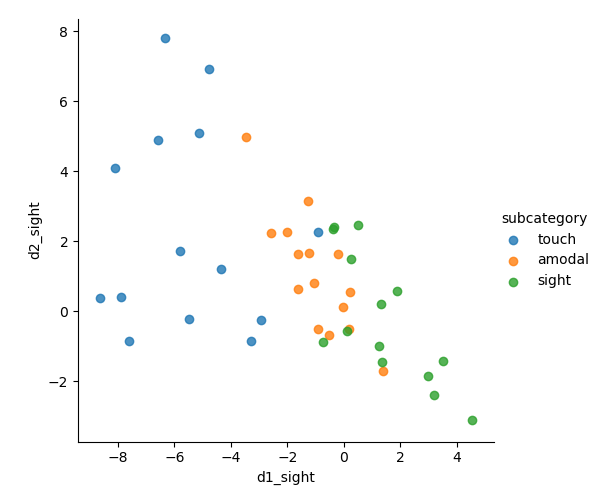

In [108]:
sns.lmplot(x="d1_sight", y="d2_sight", data=df_centroid_plus_verbs[df_centroid_plus_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

<IPython.core.display.Javascript object>


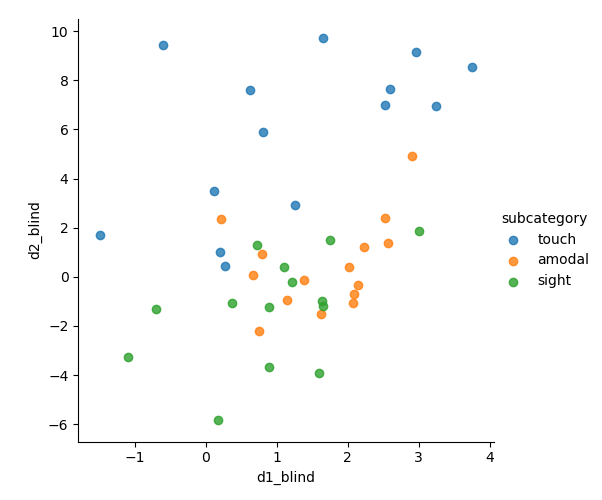

In [109]:
sns.lmplot(x="d1_blind", y="d2_blind", data=df_centroid_plus_verbs[df_centroid_plus_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

<IPython.core.display.Javascript object>


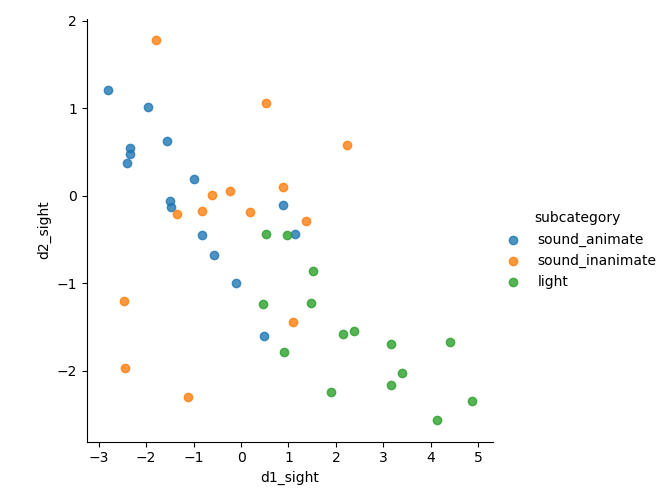

In [100]:
sns.lmplot(x="d1_sight", y="d2_sight", data=df_centroid_plus_verbs[df_centroid_plus_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory',
           legend=True)

<IPython.core.display.Javascript object>


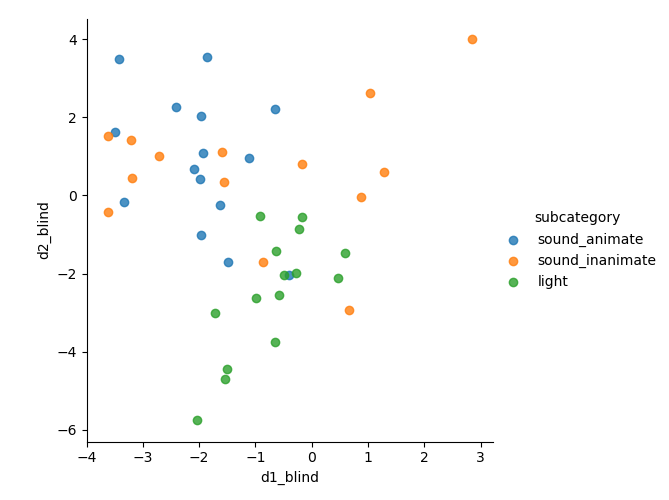

In [110]:
sns.lmplot(x="d1_blind", y="d2_blind", data=df_centroid_plus_verbs[df_centroid_plus_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory',
           legend=True)

In [ ]:
result = sm.ols(formula="d1_sight ~ cosine_distance * same_modality", data=df_centroid_plus_verbs).fit()
result.summary()